In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data=pd.read_excel('train_3_capstone.xlsx')
test_data=pd.read_excel('test_3_capstone.xlsx')

## Data Cleaning:

In [3]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,558904,22292,HANGING CHICK YELLOW DECORATION,1,2011-07-04 16:18:00,1.25,NaN,United Kingdom
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom


In [4]:
train_data.shape

(379336, 8)

In [5]:
#1a. Check for missing data and formulate an apt strategy to treat them.

In [6]:
train_data.isna().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94260
Country            0
dtype: int64

In [7]:
(train_data.isna().sum()[train_data.isna().sum()>0]/379336)*100

Description     0.253865
CustomerID     24.848683
dtype: float64

In [8]:
train_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [9]:
train_data.duplicated()[train_data.duplicated()>0].index

Int64Index([  2878,   5729,   7615,   8997,  14797,  15428,  15915,  17571,
             18464,  18666,
            ...
            378493, 378504, 378552, 378663, 378806, 378899, 379020, 379073,
            379205, 379226],
           dtype='int64', length=2673)

In [10]:
#1b. Remove duplicate data records.
train_data.drop_duplicates(inplace=True)

In [11]:
train_data.shape

(376663, 8)

In [12]:
train_data.isna().sum()

InvoiceNo          0
StockCode          0
Description      963
Quantity           0
InvoiceDate        0
UnitPrice          0
CustomerID     94243
Country            0
dtype: int64

In [13]:
train_data['InvoiceNo'].nunique()

23857

In [14]:
# didnot find any relation between invoice number and customerid as invoice number is 6 digit number and customerid is 5 digit number

In [15]:
train_data['Description'].fillna('no_data',inplace=True)

In [16]:
train_data.isna().sum()[train_data.isna().sum()>0]

CustomerID    94243
dtype: int64

In [17]:
train_data.dropna(inplace=True)

In [18]:
train_data.isna().sum()[train_data.isna().sum()>0]

Series([], dtype: int64)

In [19]:
train_data.shape

(282420, 8)

In [20]:
train_data['CustomerID'].nunique()

4353

In [21]:
#1c.Perform descriptive analytics on the given data.
train_data.describe()

,Quantity,UnitPrice,CustomerID
count,282420.000000,282420.000000,282420.000000
mean,12.110283,3.526323,15283.894880
std,297.109127,80.691250,1712.665383
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13952.000000
50%,5.000000,1.950000,15150.000000
75%,12.000000,3.750000,16788.000000
max,80995.000000,38970.000000,18287.000000


In [22]:
# We have to drop invoice number which is starts with c, as this code starts with letter 'c', it indicates a cancellation

In [23]:
train_data=train_data.loc[~train_data['InvoiceNo'].str.startswith('C',na=False)]

In [24]:
train_data.shape

(276221, 8)

In [25]:
#Checking the maximum quantity of products sold from each country

In [26]:
train_data.groupby('Country').sum()['Quantity'].sort_values(ascending=False)

Country
United Kingdom          3029694
Netherlands              137226
EIRE                      95771
Germany                   83284
France                    77004
Australia                 57153
Sweden                    26915
Switzerland               21105
Spain                     19287
Japan                     18897
Belgium                   16558
Norway                    13350
Portugal                  11313
Finland                    7195
Channel Islands            6517
Italy                      5832
Denmark                    5118
Cyprus                     3918
Austria                    3626
Singapore                  3284
Israel                     2653
Poland                     2618
Canada                     2191
Iceland                    1814
USA                        1697
Unspecified                1070
Greece                      972
United Arab Emirates        750
Malta                       677
Czech Republic              551
European Community          412


In [27]:
top_15countries_acc_to_quantities_sold=train_data.groupby('Country').sum()['Quantity'].sort_values(ascending=False).head(15)

In [28]:
top_15countries_acc_to_quantities_sold

Country
United Kingdom     3029694
Netherlands         137226
EIRE                 95771
Germany              83284
France               77004
Australia            57153
Sweden               26915
Switzerland          21105
Spain                19287
Japan                18897
Belgium              16558
Norway               13350
Portugal             11313
Finland               7195
Channel Islands       6517
Name: Quantity, dtype: int64

[]

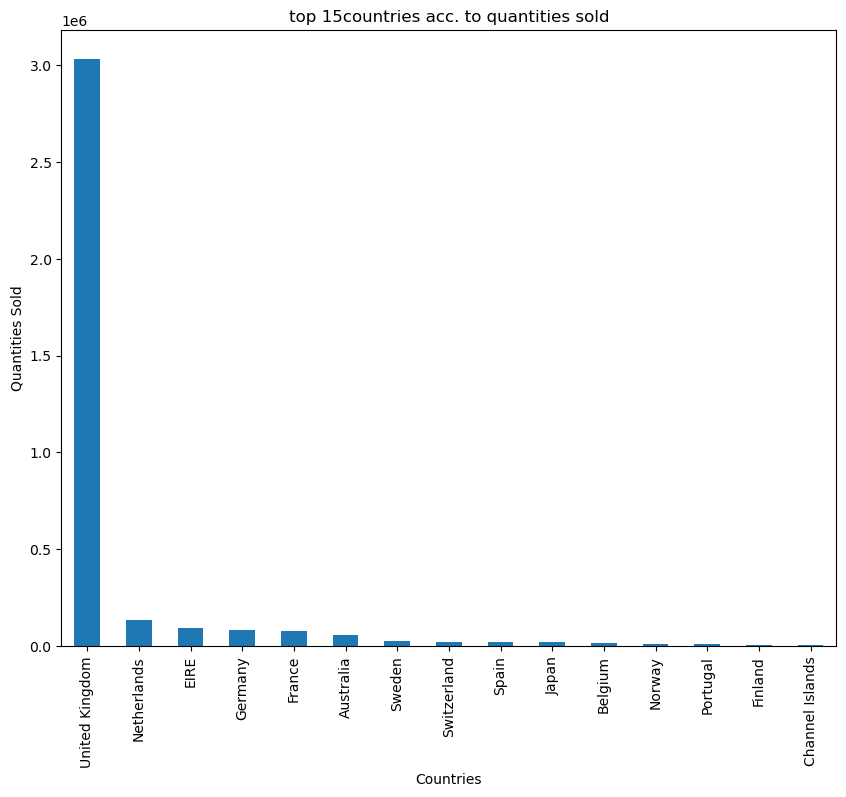

In [29]:
plt.figure(figsize=(10,8))
top_15countries_acc_to_quantities_sold.plot.bar()
plt.title("top 15countries acc. to quantities sold")
plt.xlabel('Countries')
plt.ylabel('Quantities Sold')
plt.plot()

[]

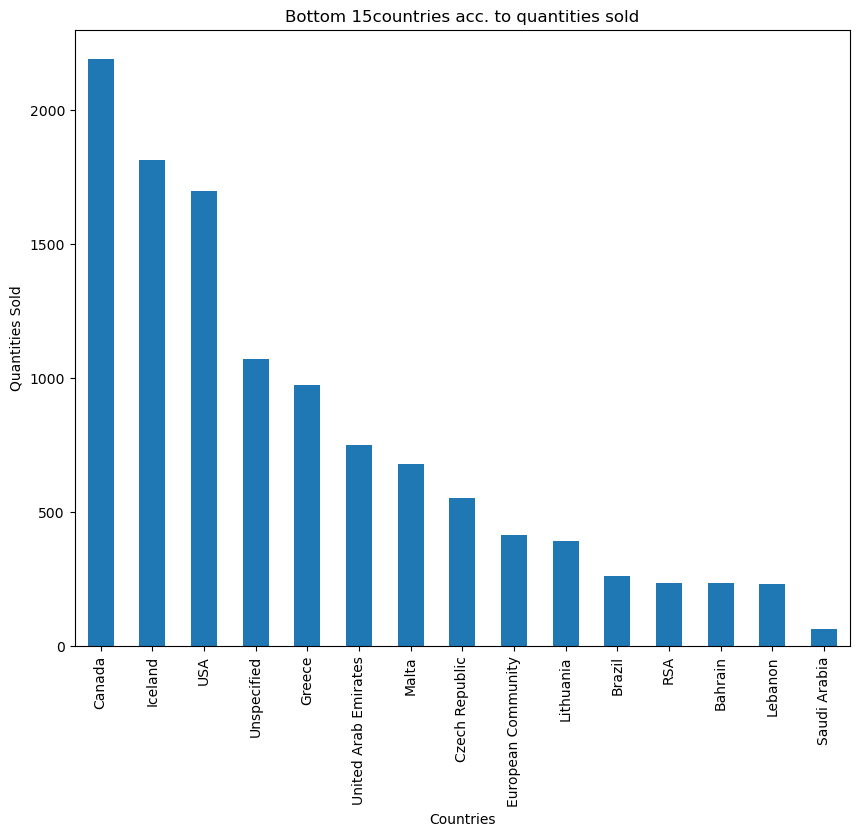

In [30]:
plt.figure(figsize=(10,8))
train_data.groupby('Country').sum()['Quantity'].sort_values(ascending=False).tail(15).plot.bar()
plt.title("Bottom 15countries acc. to quantities sold")
plt.xlabel('Countries')
plt.ylabel('Quantities Sold')
plt.plot()

In [31]:
import datetime as dt

In [32]:
train_data.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object

In [33]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1,556072,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,8,2011-06-08 14:57:00,3.75,16126.0,United Kingdom
2,551739,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,2,2011-05-04 10:58:00,2.55,18118.0,United Kingdom
3,541658,21988,PACK OF 6 SKULL PAPER PLATES,1,2011-01-20 12:16:00,0.85,15529.0,United Kingdom
4,538364,85099C,JUMBO BAG BAROQUE BLACK WHITE,10,2010-12-10 17:26:00,1.95,14448.0,United Kingdom
5,552306,84789,ENCHANTED BIRD PLANT CAGE,4,2011-05-08 15:20:00,3.75,13911.0,United Kingdom


In [34]:
train_data.sort_values(by='InvoiceDate',inplace=True)

In [35]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
99201,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
81407,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
86726,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
267050,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
163173,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom


In [36]:
train_data['Order_Month']=train_data['InvoiceDate'].dt.to_period('M')

In [37]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Month
99201,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
81407,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12
86726,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12
267050,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12
163173,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12


## Data Transformation: 

In [38]:
#Q2. Perform cohort analysis (a cohort is a group of subjects that share a defining characteristic). Observe how a cohort behaves across time and compare it to other cohorts.

In [39]:
#2a. Create month cohorts and analyze active customers for each cohort.
train_data['Cohort_Month']=train_data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')

In [40]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Month,Cohort_Month
99201,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
81407,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12
86726,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12
267050,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,2010-12
163173,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12


In [41]:
retail_cohort=train_data.groupby(['Order_Month','Cohort_Month']).agg(n_customers=('CustomerID','nunique')).reset_index()

In [42]:
retail_cohort

,Order_Month,Cohort_Month,n_customers
0,2010-12,2010-12,872
1,2011-01,2010-12,319
2,2011-01,2011-01,416
3,2011-02,2010-12,276
4,2011-02,2011-01,92
...,...,...,...
86,2011-12,2011-08,21
87,2011-12,2011-09,35
88,2011-12,2011-10,41
89,2011-12,2011-11,36


In [43]:
retail_cohort['period']=retail_cohort['Order_Month']-retail_cohort['Cohort_Month']

In [44]:
retail_cohort['period']=retail_cohort['period'].apply(lambda x:x.n)

In [45]:
retail_cohort.head()

,Order_Month,Cohort_Month,n_customers,period
0,2010-12,2010-12,872,0
1,2011-01,2010-12,319,1
2,2011-01,2011-01,416,0
3,2011-02,2010-12,276,2
4,2011-02,2011-01,92,1


In [46]:
#Let's create a Pivot table foR Active Customers 

In [47]:
active_customers_table=retail_cohort.pivot_table(index='Cohort_Month',columns='period',values='n_customers')

In [48]:
#a. Create month cohorts and analyze active customers for each cohort.
active_customers_table

period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,,
2010-12,872.0,319.0,276.0,331.0,316.0,347.0,316.0,300.0,306.0,343.0,326.0,434.0,228.0
2011-01,416.0,92.0,112.0,97.0,136.0,117.0,105.0,102.0,127.0,136.0,154.0,52.0,NaN
2011-02,377.0,71.0,71.0,103.0,102.0,92.0,93.0,100.0,94.0,114.0,26.0,NaN,NaN
2011-03,450.0,66.0,112.0,90.0,101.0,75.0,119.0,102.0,124.0,37.0,NaN,NaN,NaN
2011-04,299.0,62.0,60.0,60.0,58.0,68.0,65.0,78.0,21.0,NaN,NaN,NaN,NaN
2011-05,283.0,53.0,48.0,49.0,58.0,68.0,75.0,27.0,NaN,NaN,NaN,NaN,NaN
2011-06,244.0,41.0,37.0,62.0,55.0,81.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,190.0,35.0,38.0,43.0,54.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,168.0,35.0,41.0,40.0,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
cohort_size=active_customers_table.iloc[:,0]

In [50]:
#2b. Analyze the retention rate of customers.
retention_matrix=active_customers_table.divide(cohort_size,axis=0)

In [51]:
retention_matrix=round(retention_matrix,2)

In [52]:
retention_matrix

period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort_Month,,,,,,,,,,,,,
2010-12,1.0,0.37,0.32,0.38,0.36,0.40,0.36,0.34,0.35,0.39,0.37,0.50,0.26
2011-01,1.0,0.22,0.27,0.23,0.33,0.28,0.25,0.25,0.31,0.33,0.37,0.12,NaN
2011-02,1.0,0.19,0.19,0.27,0.27,0.24,0.25,0.27,0.25,0.30,0.07,NaN,NaN
2011-03,1.0,0.15,0.25,0.20,0.22,0.17,0.26,0.23,0.28,0.08,NaN,NaN,NaN
2011-04,1.0,0.21,0.20,0.20,0.19,0.23,0.22,0.26,0.07,NaN,NaN,NaN,NaN
2011-05,1.0,0.19,0.17,0.17,0.20,0.24,0.27,0.10,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.17,0.15,0.25,0.23,0.33,0.09,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.18,0.20,0.23,0.28,0.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.21,0.24,0.24,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


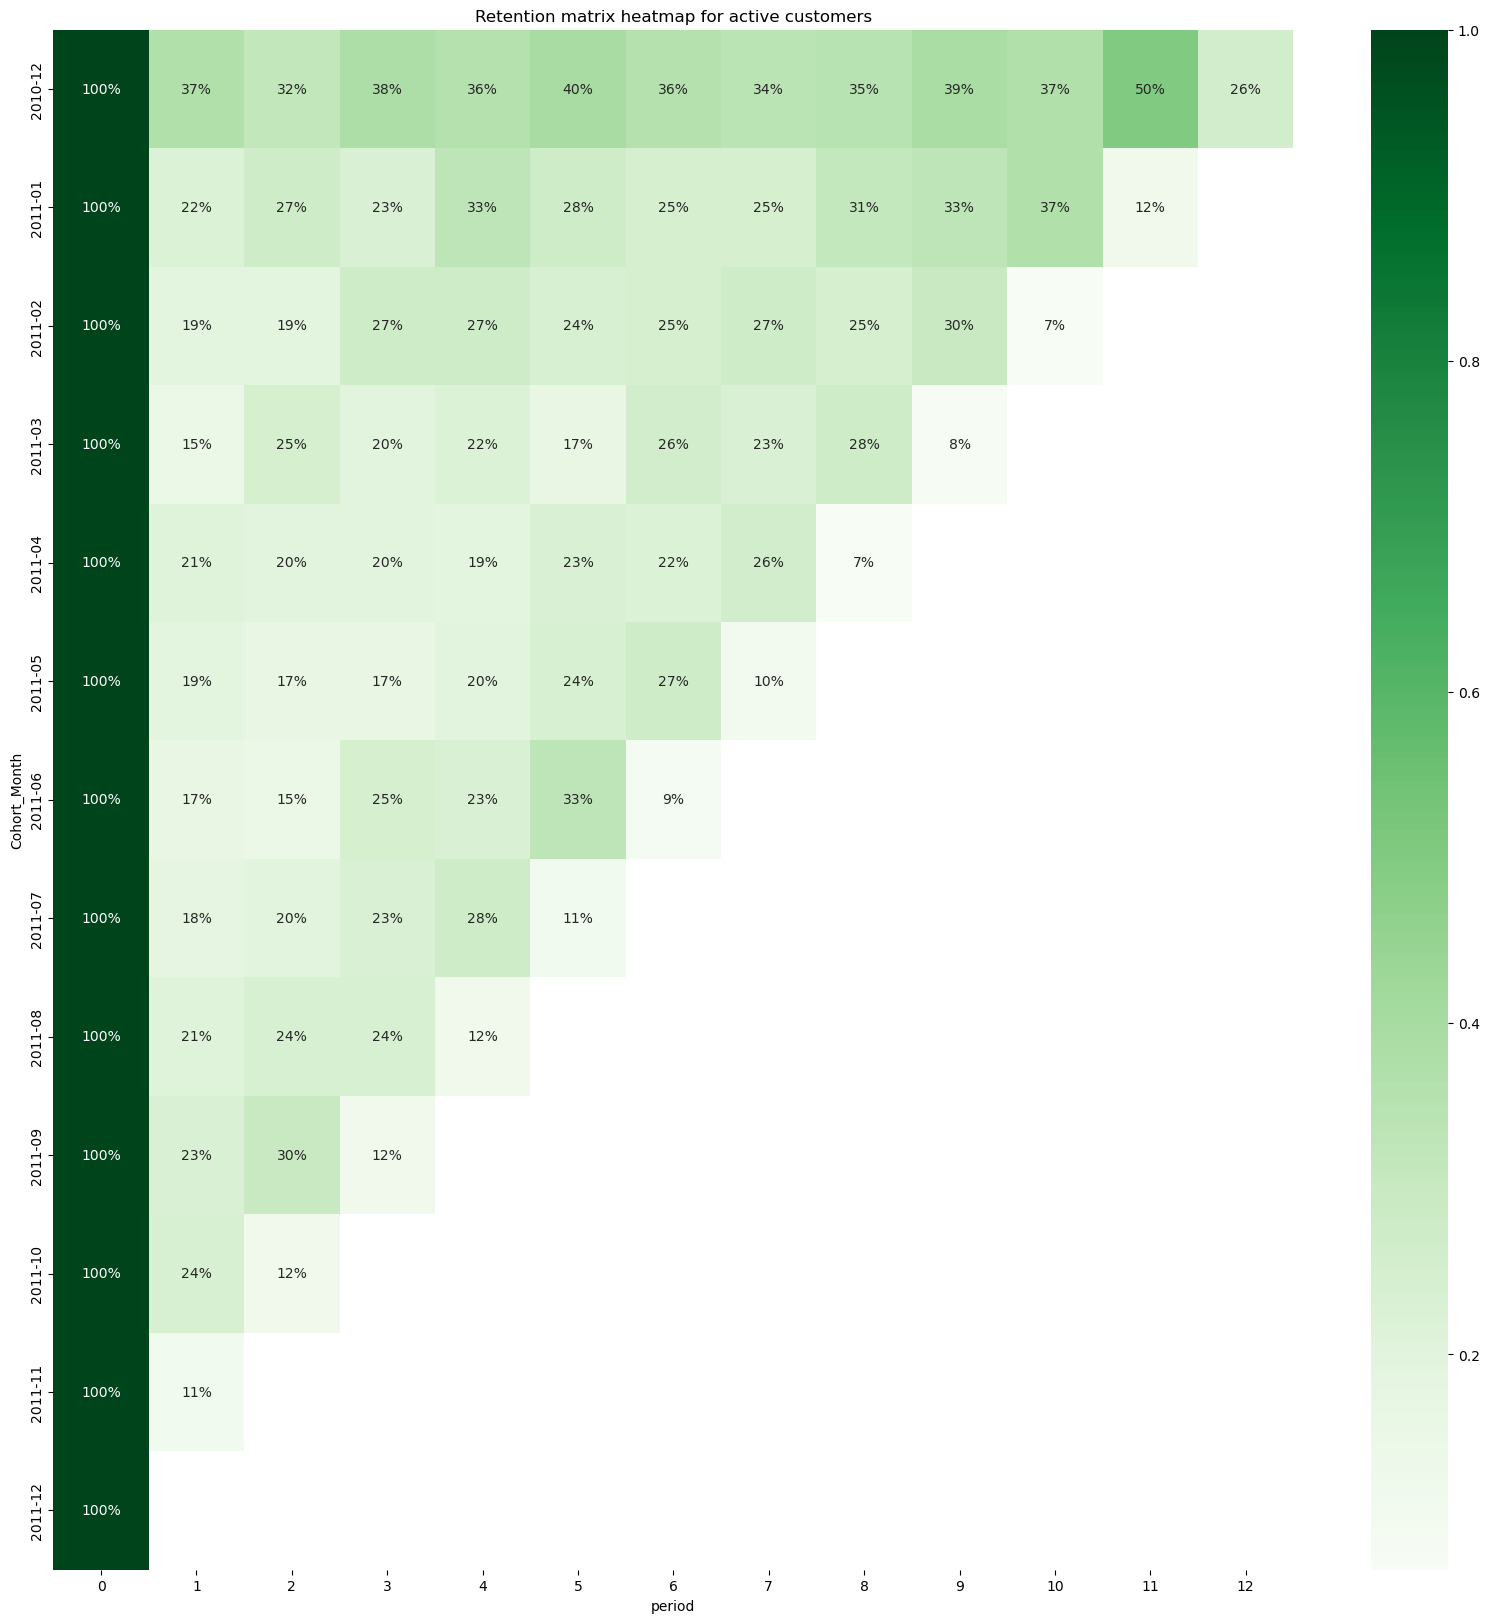

In [53]:
plt.figure(figsize=(20,20))
sns.heatmap(retention_matrix,annot=True,fmt='.0%',cmap='Greens')
plt.title("Retention matrix heatmap for active customers")
plt.show()

In [54]:
# Insights from Retention matrix
#1. The customers registered in December 10 retained only 37% in next following month and first cohort December 2010 performed
#  well in all cohorts as it get retain 50% customers back after almost 1 year

## Data Modeling :

In [55]:
#1. Build a RFM (Recency Frequency Monetary) model. Recency means the number of days since a customer made the last purchase. Frequency is the number of purchase in a given period. It could be 3 months, 6 months or 1 year. Monetary is the total amount of money a customer spent in that given period. Therefore, big spenders will be differentiated among other customers such as MVP (Minimum Viable Product) or VIP.

In [56]:
train_data.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Order_Month', 'Cohort_Month'],
      dtype='object')

In [57]:
train_data['Customer_last_order_date']=train_data.groupby('CustomerID')['InvoiceDate'].transform('max')

In [58]:
train_data['Reference_date']=train_data['InvoiceDate'].max()+dt.timedelta(1)

In [59]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Month,Cohort_Month,Customer_last_order_date,Reference_date
99201,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00
81407,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00
86726,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00
267050,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00
163173,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00


In [60]:
train_data['Days_till_last_ordered']=(train_data['Reference_date']-train_data['Customer_last_order_date']).dt.days

In [61]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Month,Cohort_Month,Customer_last_order_date,Reference_date,Days_till_last_ordered
99201,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372
81407,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372
86726,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372
267050,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372
163173,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372


In [62]:
recency_df=train_data.groupby('CustomerID').min()['Days_till_last_ordered']

In [63]:
recency_df=recency_df.to_frame().reset_index()

In [64]:
recency_df.head()

,CustomerID,Days_till_last_ordered
0,12346.0,326
1,12347.0,2
2,12348.0,75
3,12349.0,19
4,12350.0,310


In [65]:
# Frequency Analysis

In [66]:
Frequency_df=train_data.groupby('CustomerID').count()['InvoiceNo'].to_frame().reset_index()

In [67]:
Frequency_df.head()

,CustomerID,InvoiceNo
0,12346.0,1
1,12347.0,132
2,12348.0,20
3,12349.0,50
4,12350.0,11


In [68]:
#Monetary Analysis

In [69]:
train_data['Total_Amount']=train_data['Quantity']*train_data['UnitPrice']

In [70]:
train_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Order_Month,Cohort_Month,Customer_last_order_date,Reference_date,Days_till_last_ordered,Total_Amount
99201,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372,20.34
81407,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372,20.34
86726,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372,15.30
267050,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372,15.30
163173,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12,2010-12,2010-12-02 15:27:00,2011-12-10 12:50:00,372,22.00


In [71]:
Monetary_df=train_data.groupby('CustomerID').sum()['Total_Amount'].to_frame().reset_index()

In [72]:
Monetary_df.head()

,CustomerID,Total_Amount
0,12346.0,77183.60
1,12347.0,3124.96
2,12348.0,1009.88
3,12349.0,1344.17
4,12350.0,213.30


In [73]:
#2. Calculate RFM metrics.

In [74]:
RF_DF=pd.merge(recency_df,Frequency_df,on='CustomerID')

In [75]:
RFM_df=pd.merge(RF_DF,Monetary_df,on='CustomerID')

In [76]:
RFM_df.head()

,CustomerID,Days_till_last_ordered,InvoiceNo,Total_Amount
0,12346.0,326,1,77183.60
1,12347.0,2,132,3124.96
2,12348.0,75,20,1009.88
3,12349.0,19,50,1344.17
4,12350.0,310,11,213.30


In [77]:
#3. Build RFM Segments. Give recency, frequency, and monetary scores individually by dividing them into quartiles.
r_labels=range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)

In [78]:
RFM_df['R']=pd.qcut(RFM_df['Days_till_last_ordered'],q=4,labels=r_labels)

In [79]:
RFM_df['F']=pd.qcut(RFM_df['InvoiceNo'],q=4,labels=f_labels)

In [80]:
RFM_df['M']=pd.qcut(RFM_df['Total_Amount'],q=4,labels=m_labels)

In [81]:
RFM_df.head()

,CustomerID,Days_till_last_ordered,InvoiceNo,Total_Amount,R,F,M
0,12346.0,326,1,77183.60,1,1,4
1,12347.0,2,132,3124.96,4,4,4
2,12348.0,75,20,1009.88,2,2,3
3,12349.0,19,50,1344.17,3,3,4
4,12350.0,310,11,213.30,1,1,2


In [82]:
#2b1. Combine three ratings to get a RFM segment (as strings).
RFM_df['RFM_Segment']=RFM_df['R'].astype(str)+RFM_df['F'].astype(str)+RFM_df['M'].astype(str)

In [83]:
RFM_df.head()

,CustomerID,Days_till_last_ordered,InvoiceNo,Total_Amount,R,F,M,RFM_Segment
0,12346.0,326,1,77183.60,1,1,4,114
1,12347.0,2,132,3124.96,4,4,4,444
2,12348.0,75,20,1009.88,2,2,3,223
3,12349.0,19,50,1344.17,3,3,4,334
4,12350.0,310,11,213.30,1,1,2,112


In [84]:
#2b2. Get the RFM score by adding up the three ratings.
RFM_df['RFM_Score']=RFM_df['R'].astype(int)+RFM_df['F'].astype(int)+RFM_df['M'].astype(int)

In [85]:
RFM_df.rename(columns={'Days_till_last_ordered':'Recency','InvoiceNo':'Frequency','Total_Amount':'Monetary'},inplace=True)

In [86]:
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,12346.0,326,1,77183.60,1,1,4,114,6
1,12347.0,2,132,3124.96,4,4,4,444,12
2,12348.0,75,20,1009.88,2,2,3,223,7
3,12349.0,19,50,1344.17,3,3,4,334,10
4,12350.0,310,11,213.30,1,1,2,112,4


In [87]:
RFM_df.groupby('RFM_Score').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']})

Recency   Frequency     Monetary      
                 mean        mean         mean count
RFM_Score                                           
3          260.409794    5.912371   111.192423   388
4          178.686076    9.924051   170.063696   395
5          146.546559   14.228745   249.977976   494
6          102.252174   19.986957   675.426500   460
7           82.850780   27.685969   532.346793   449
8           61.367983   39.486486   689.861809   481
9           47.168734   55.491315  1430.462660   403
10          32.310023   78.925408  1437.528578   429
11          21.171123  134.026738  2907.198422   374
12           7.314732  258.955357  6454.381228   448

In [88]:
#2b3. Analyze the RFM segments by summarizing them and comment on the findings.
def Customer_Segment(RFM_df):
    if RFM_df['RFM_Score']>9:
        return 'Gold'
    elif (RFM_df['RFM_Score']<=9) and (RFM_df['RFM_Score']>=5):
        return 'Silver'
    else:
        return 'Bronze'

In [89]:
RFM_df['Customer_Segment']=RFM_df.apply(Customer_Segment,axis=1)

In [90]:
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Customer_Segment
0,12346.0,326,1,77183.60,1,1,4,114,6,Silver
1,12347.0,2,132,3124.96,4,4,4,444,12,Gold
2,12348.0,75,20,1009.88,2,2,3,223,7,Silver
3,12349.0,19,50,1344.17,3,3,4,334,10,Gold
4,12350.0,310,11,213.30,1,1,2,112,4,Bronze


In [91]:
RFM_df.groupby('Customer_Segment').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']})

Recency   Frequency     Monetary      
                        mean        mean         mean count
Customer_Segment                                           
Bronze            219.182631    7.936143   140.891213   783
Gold               20.028777  159.869704  3673.505004  1251
Silver             89.705728   30.612156   691.521208  2287

<AxesSubplot:>

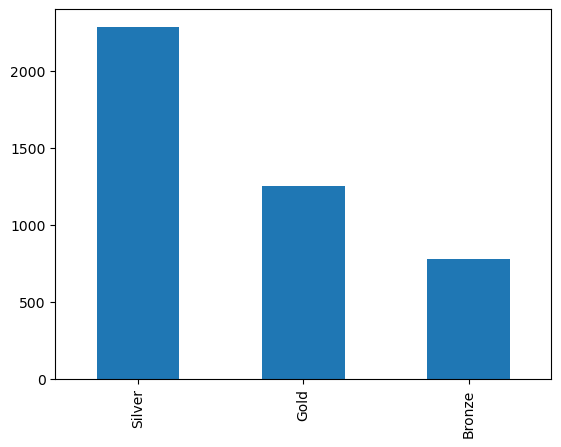

In [92]:
RFM_df['Customer_Segment'].value_counts().plot(kind='bar')

In [93]:
# So,  Most of the customers are  fall in Silver segment category

## Data Modeling :

In [94]:
#Q1. Create clusters using k-means clustering algorithm.

In [95]:
#Q1a. Prepare the data for the algorithm. If the data is asymmetrically distributed, manage the skewness with appropriate transformation. Standardize the data.

In [96]:
#Now to Check distribution of Variables

<AxesSubplot:xlabel='Recency', ylabel='Density'>

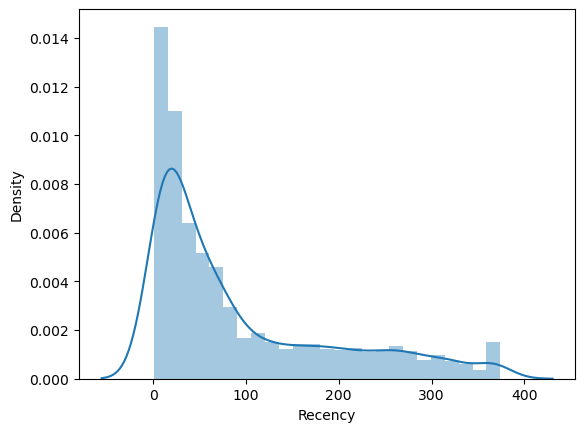

In [97]:
sns.distplot(RFM_df['Recency'])

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

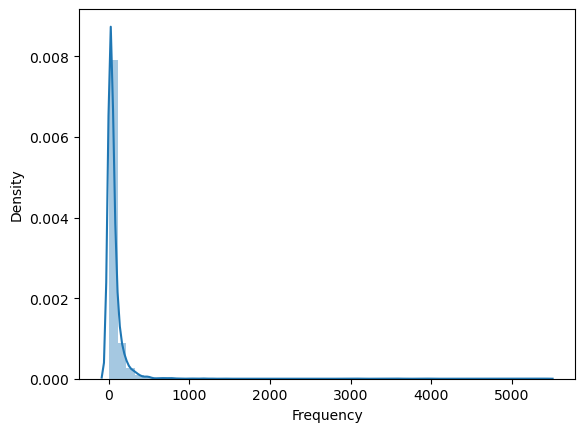

In [98]:
sns.distplot(RFM_df['Frequency'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

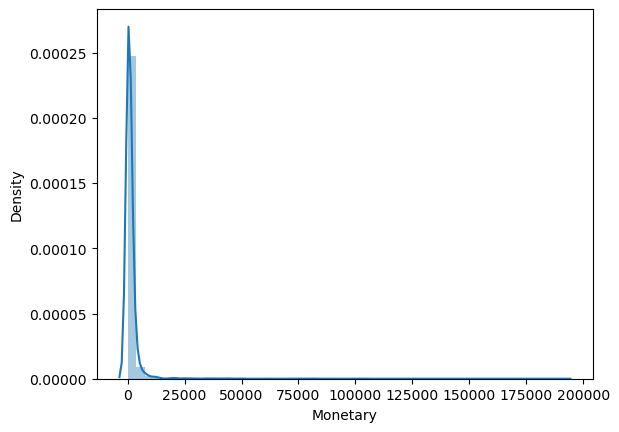

In [99]:
sns.distplot(RFM_df['Monetary'])

In [100]:
# Its clear that all variables are unsymmetrical distributed ,and data is skewed ,so need log transformation to unskew

In [101]:
RFM_df.describe()

,CustomerID,Recency,Frequency,Monetary,RFM_Score
count,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000
mean,15301.333719,92.995371,63.925249,1455.075580,7.491784
std,1721.656570,100.371089,158.847536,6426.698726,2.817437
min,12346.000000,1.000000,1.000000,0.000000,3.000000
25%,13815.000000,18.000000,12.000000,209.970000,5.000000
50%,15300.000000,51.000000,29.000000,479.090000,7.000000
75%,16780.000000,144.000000,70.000000,1180.080000,10.000000
max,18287.000000,374.000000,5413.000000,190759.920000,12.000000


In [102]:
# So, there is minimum value of 0 in Monetary column , so have to be treated before log 
# So let's add 1 to all monetary values,as it will not impact overall monetary of every customer

In [103]:
RFM_df['Monetary']=RFM_df['Monetary']+1

In [104]:
RFM_df.describe()

,CustomerID,Recency,Frequency,Monetary,RFM_Score
count,4321.000000,4321.000000,4321.000000,4321.000000,4321.000000
mean,15301.333719,92.995371,63.925249,1456.075580,7.491784
std,1721.656570,100.371089,158.847536,6426.698726,2.817437
min,12346.000000,1.000000,1.000000,1.000000,3.000000
25%,13815.000000,18.000000,12.000000,210.970000,5.000000
50%,15300.000000,51.000000,29.000000,480.090000,7.000000
75%,16780.000000,144.000000,70.000000,1181.080000,10.000000
max,18287.000000,374.000000,5413.000000,190760.920000,12.000000


In [105]:
RFM_log= RFM_df[['Recency', 'Frequency', 'Monetary']].apply(np.sqrt, axis = 1).round(3)

In [106]:
RFM_log=np.log(RFM_log)

<AxesSubplot:xlabel='Frequency', ylabel='Density'>

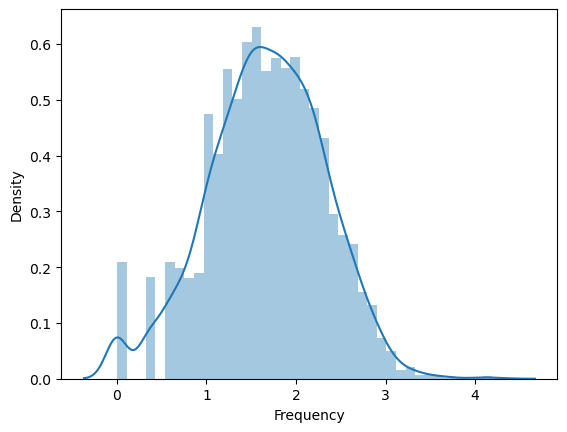

In [107]:
sns.distplot(RFM_log['Frequency'])

<AxesSubplot:xlabel='Recency', ylabel='Density'>

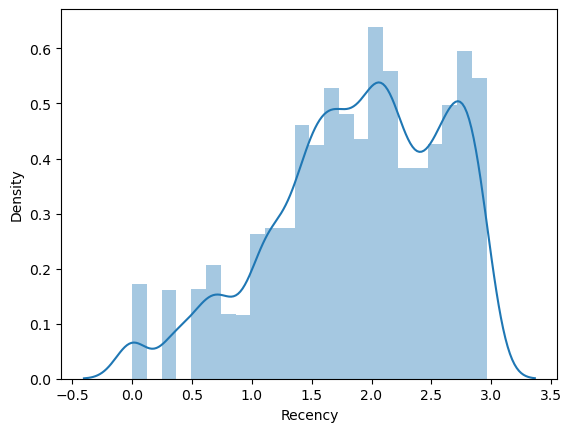

In [108]:
sns.distplot(RFM_log['Recency'])

<AxesSubplot:xlabel='Monetary', ylabel='Density'>

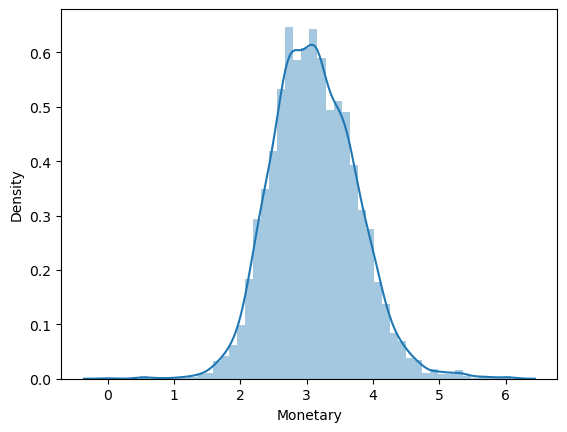

In [109]:
sns.distplot(RFM_log['Monetary'])

In [110]:
from sklearn.preprocessing import StandardScaler

In [111]:
sc=StandardScaler()

In [112]:
RFM_normalized=sc.fit_transform(RFM_log)

In [113]:
from sklearn.cluster import KMeans

In [114]:
K_range=range(1,8)
inertia=[]

In [115]:
for k in K_range:
    K_model=KMeans(n_clusters=k,random_state=1)
    K_model.fit(RFM_normalized)
    inertia.append(K_model.inertia_)

In [116]:
#Q1b. Decide the optimum number of clusters to be formed.

In [117]:
# Plot Elbow Curver for Optimal number of Clusters

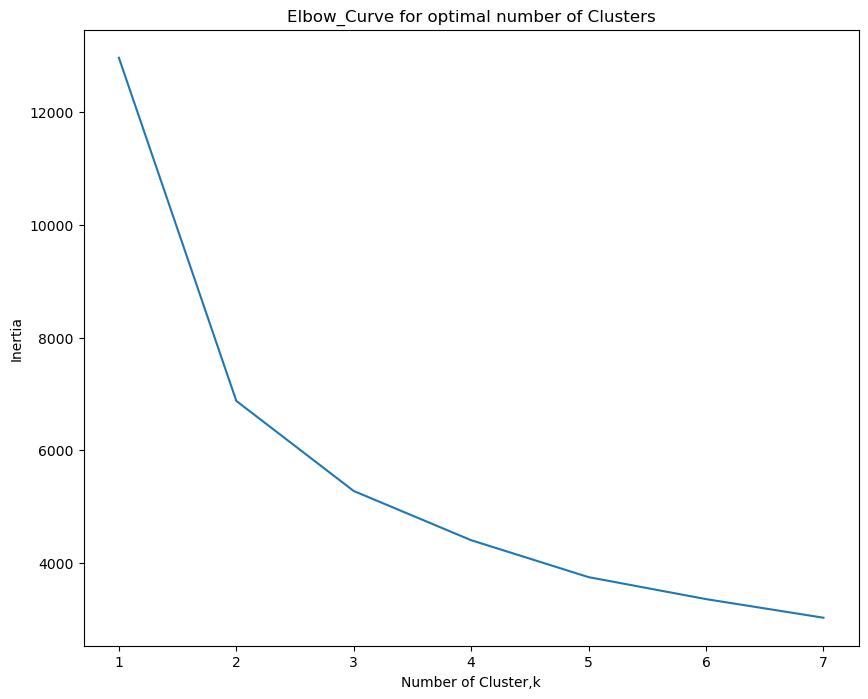

In [118]:
plt.figure(figsize=(10,8))
plt.plot(K_range,inertia)
plt.xlabel("Number of Cluster,k")
plt.ylabel('Inertia')
plt.title('Elbow_Curve for optimal number of Clusters')
plt.show()

In [119]:
# So used 3 as optimal number of Clusters

In [120]:
#Q1c. Analyze these clusters and comment on the results.

Optimal_model=KMeans(n_clusters=3,random_state=1)

In [121]:
Optimal_model.fit(RFM_normalized)

KMeans(n_clusters=3, random_state=1)

In [122]:
Optimal_model.labels_

array([2, 1, 2, ..., 0, 1, 2])

In [123]:
RFM_df['Cluster_labels']=Optimal_model.labels_

In [124]:
RFM_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,Customer_Segment,Cluster_labels
0,12346.0,326,1,77184.60,1,1,4,114,6,Silver,2
1,12347.0,2,132,3125.96,4,4,4,444,12,Gold,1
2,12348.0,75,20,1010.88,2,2,3,223,7,Silver,2
3,12349.0,19,50,1345.17,3,3,4,334,10,Gold,2
4,12350.0,310,11,214.30,1,1,2,112,4,Bronze,0


In [125]:
RFM_df.groupby('Cluster_labels').agg({'Recency': 'mean','Frequency': 'mean','Monetary': ['mean', 'count'],}).round(0)

Recency Frequency Monetary      
                  mean      mean     mean count
Cluster_labels                                 
0                170.0      11.0    206.0  1547
1                 13.0     187.0   4729.0   921
2                 69.0      47.0    874.0  1853

In [126]:
New_RFM_normalized=pd.DataFrame(RFM_normalized,index=RFM_df.index,columns=['Recency','Frequency', 'Monetary'])

In [127]:
New_RFM_normalized.head()

,Recency,Frequency,Monetary
0,1.406269,-2.540488,3.929975
1,-2.150740,1.186539,1.422035
2,0.380214,-0.253892,0.539041
3,-0.578478,0.445545,0.762537
4,1.371179,-0.710002,-0.674212


In [128]:
New_RFM_normalized['Customer_Segment']=RFM_df['Customer_Segment']

In [129]:
New_RFM_normalized['Cluster_labels']=Optimal_model.labels_

In [130]:
New_RFM_normalized['CustomerID']=RFM_df['CustomerID']

In [131]:
New_RFM_normalized.head()

,Recency,Frequency,Monetary,Customer_Segment,Cluster_labels,CustomerID
0,1.406269,-2.540488,3.929975,Silver,2,12346.0
1,-2.150740,1.186539,1.422035,Gold,1,12347.0
2,0.380214,-0.253892,0.539041,Silver,2,12348.0
3,-0.578478,0.445545,0.762537,Gold,2,12349.0
4,1.371179,-0.710002,-0.674212,Bronze,0,12350.0


In [132]:
RFM_melt=pd.melt(New_RFM_normalized,id_vars=['CustomerID','Customer_Segment','Cluster_labels'],var_name='Metric',value_name='Values')

In [133]:
RFM_melt

,CustomerID,Customer_Segment,Cluster_labels,Metric,Values
0,12346.0,Silver,2,Recency,1.406269
1,12347.0,Gold,1,Recency,-2.150740
2,12348.0,Silver,2,Recency,0.380214
3,12349.0,Gold,2,Recency,-0.578478
4,12350.0,Bronze,0,Recency,1.371179
...,...,...,...,...,...
12958,18280.0,Bronze,0,Monetary,-1.329675
12959,18281.0,Bronze,0,Monetary,-1.666278
12960,18282.0,Silver,0,Monetary,-1.123842
12961,18283.0,Gold,1,Monetary,0.821917


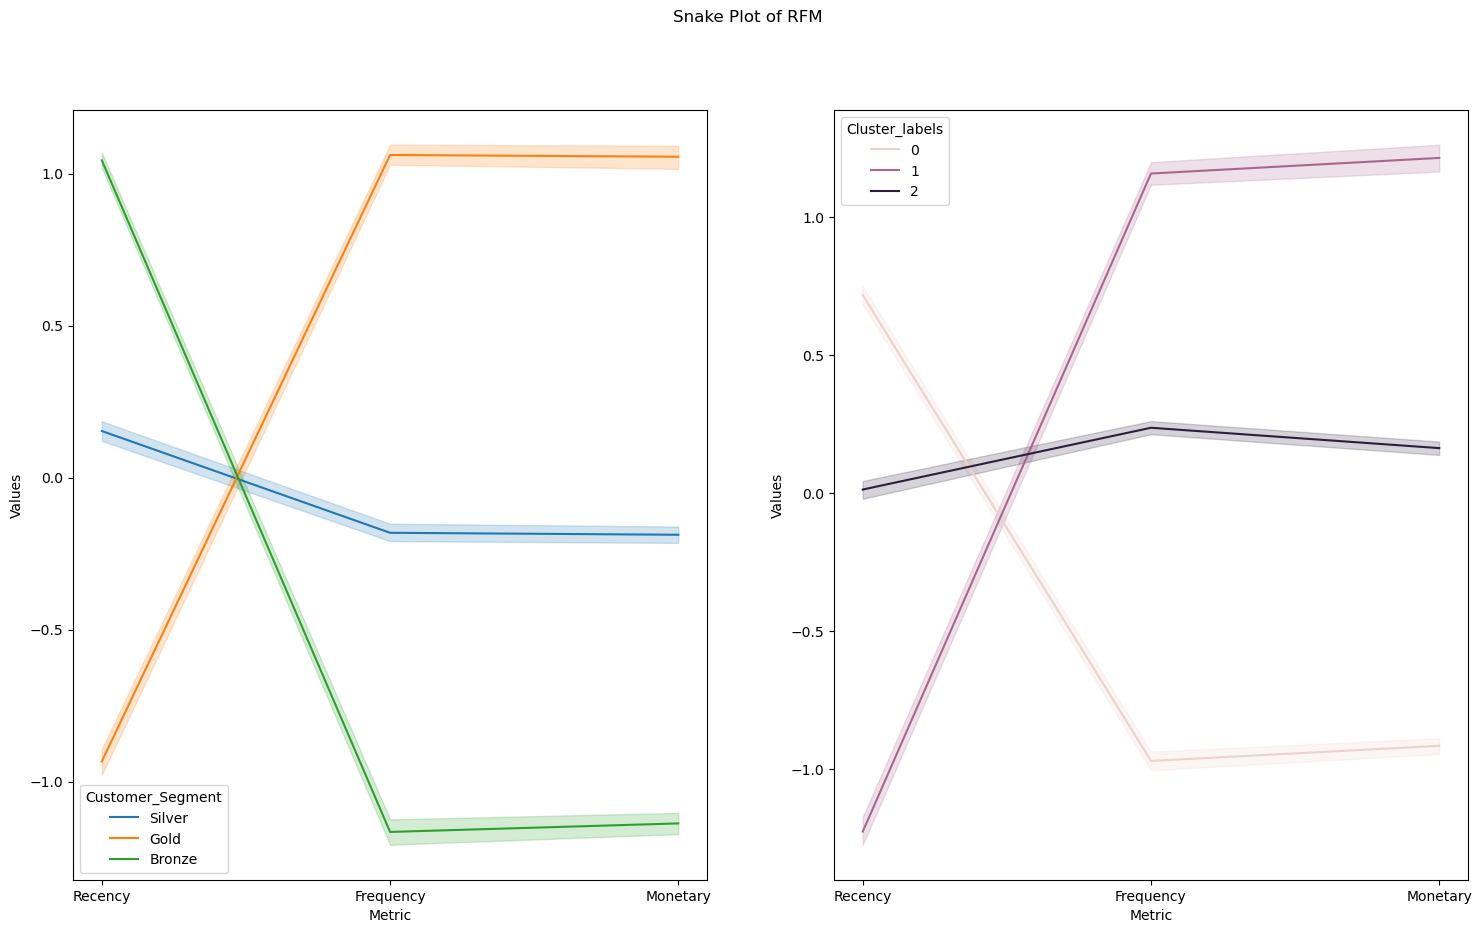

In [134]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(18,10))
sns.lineplot(x='Metric',y='Values',hue='Customer_Segment',data=RFM_melt,ax=ax1)
sns.lineplot(x='Metric',y='Values',hue='Cluster_labels',data=RFM_melt,ax=ax2)
plt.suptitle('Snake Plot of RFM')
plt.show()

In [135]:
train_data.to_excel('train_data.xlsx',index=False,header=True)

In [136]:
RFM_df.to_excel('RFM_df.xlsx',index=False,header=True)

In [137]:
RFM_df.shape

(4321, 11)

<AxesSubplot:xlabel='Cluster_labels', ylabel='Recency'>

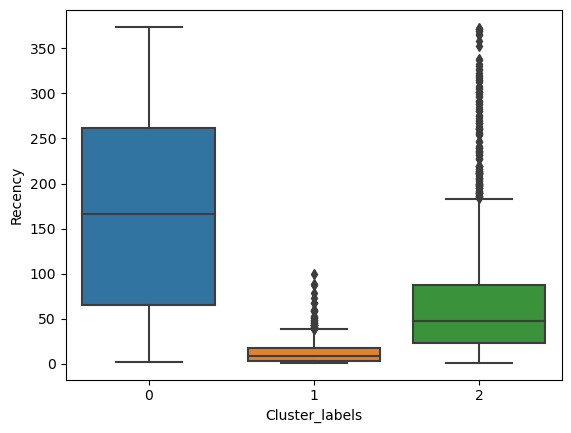

In [138]:
sns.boxplot(x='Cluster_labels',y='Recency',data=RFM_df)

<AxesSubplot:xlabel='Cluster_labels', ylabel='Frequency'>

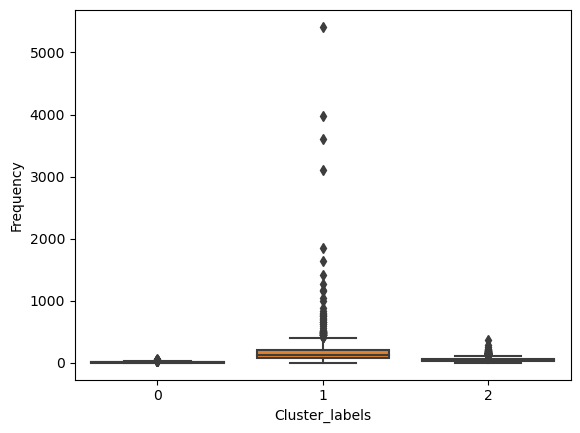

In [139]:
sns.boxplot(x='Cluster_labels',y='Frequency',data=RFM_df)

<AxesSubplot:xlabel='Cluster_labels', ylabel='Monetary'>

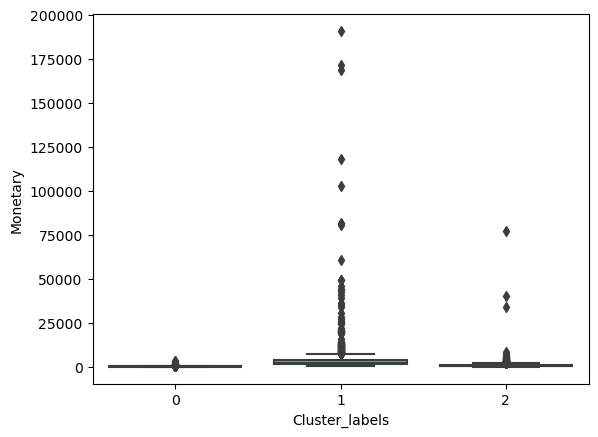

In [140]:
sns.boxplot(x='Cluster_labels',y='Monetary',data=RFM_df)

In [141]:
# Inference from these Cluster Analysis
#1. Cluster label 1 are the best customers from business point of view as they comes more frequently and 
#   spending high amount and they are more recently ones .
#2 Cluster label 0 are least impoertance ones as they didnot comes frequently and their recency is high in number of days
#3 Cluster label 2 are average customers as few of them are spending lot and some have high recency

 ## Plese refer tableau file for visualisation and Data reporting part